# Lab_02
<code>Objective</code>
- Implement at least two supervised learning algorithms (K-Nearest Neighbors, Linear Regression, Logistic Regression, Decision Trees, Random Forests, or Gradient Boosting)
- Apply these algorithms on any real-world dataset, source from scikit-learn, UCI Machine Learning Repository, Kaggle, etc.

In [1]:
import numpy as np  # for numerical operation
import pandas as pd  # for tabular data

from matplotlib import pyplot as pyplot # plotting library
import seaborn as sns   # plotting library

# used to make sure plots are rendered correctly in Jupyter Notebooks
%matplotlib inline

import warnings # ignore warnings
warnings.filterwarnings('ignore')

#### Some basic analysis of the dataset after downloading it from Kaggle.
- Features
- Distribution of values in the features
- Quality of the data
- Any missing values

In [2]:
# dataset source https://www.kaggle.com/CooperUnion/cardataset
# create the variable dataframe from the csv
car_df = pd.read_csv('data.csv')
# show how many rows in the file
len(car_df)

11914

In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
# show the first 5 rows; 5 is the default
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Fixing the feature values so that there is some consistency by normalizing them (replacing all spaces with underscores and lowercase all letters)

In [5]:
# Lowercase all the column names and replace spaces with underscores
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

# Selects only columns with string values
string_columns = list(car_df.dtypes[car_df.dtypes == 'object'].index)

# Lowercase and replace spaces with underscores for values in all string columns of the DataFrame
for col in string_columns:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')

In [6]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### Target variable analysis:
- the msrp column is the target variable (y) that is going to be learned

<Axes: xlabel='msrp', ylabel='Count'>

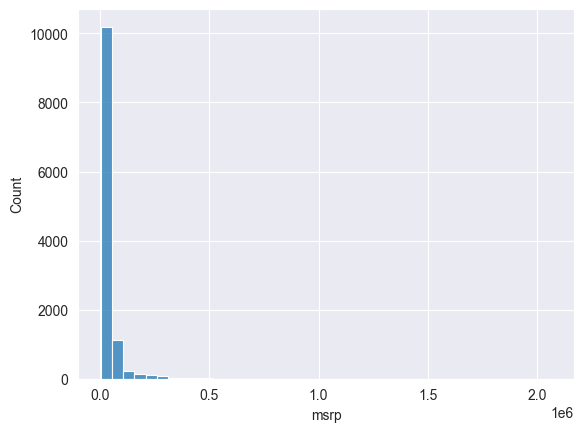

In [7]:
# using seaborn to visualize what the values of y look like
sns.histplot(car_df.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

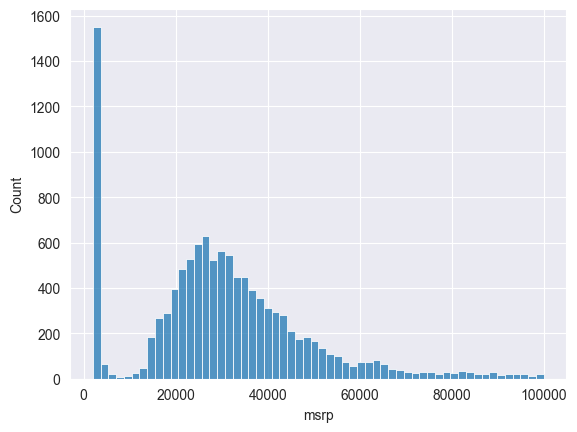

In [8]:
# focusing in on the part of the data that is most viable to the project
sns.histplot(car_df.msrp[car_df.msrp < 100000])

<Axes: xlabel='msrp', ylabel='Count'>

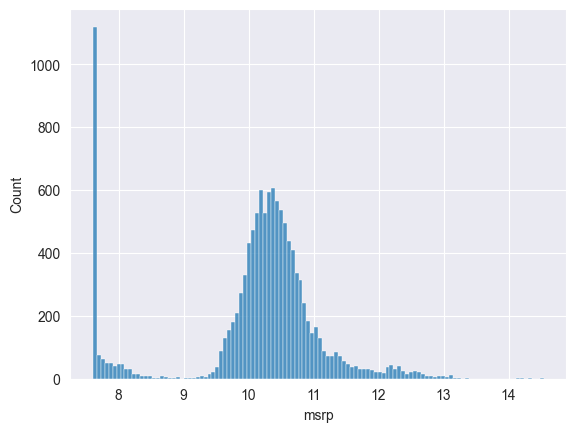

In [9]:
log_price = np.log1p(car_df.msrp)
sns.histplot(log_price)

In [10]:
# looking for any empty values in the dataset
car_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#### - Splitting the data into validation, test, and training sets by splitting them individually

n = len(car_df) # set the variable n to the number of rows in the DataFrame

n_val = int(0.2 * n)    # calculate the number of rows for validation (20%)
n_test = int(0.2 * n)   # calculate the number of rows for testing (20%)
n_train = n - (n_val + n_test)  # calculate the number of rows for training (60%)

np.random.seed(42)  # set the random seed assuring the results are reproducible
idx = np.arange(n)
np.random.shuffle(idx)  # create a NumPy array with indices from 0 to (n-1), then shuffles it

car_df_shuffle = car_df.iloc[idx]   # uses the array with indices to get a shuffled DataFrame

car_df_val = car_df_shuffle.iloc[n_train:n_train+n_val].copy()
car_df_train = car_df_shuffle.iloc[:n_train].copy()
car_df_test = car_df_shuffle.iloc[n_train+n_val:].copy()

In [10]:
n = len(car_df) # set the variable n to the number of rows in the DataFrame

n_val = int(0.2 * n)    # calculate the number of rows for validation (20%)
n_test = int(0.2 * n)   # calculate the number of rows for testing (20%)
n_train = n - (n_val + n_test)  # calculate the number of rows for training (60%)

np.random.seed(42)  # set the random seed assuring the results are reproducible
idx = np.arange(n)
np.random.shuffle(idx)  # create a NumPy array with indices from 0 to (n-1), then shuffles it

car_df_shuffle = car_df.iloc[idx]   # uses the array with indices to get a shuffled DataFrame

car_df_val = car_df_shuffle.iloc[n_train:n_train+n_val].copy()
car_df_train = car_df_shuffle.iloc[:n_train].copy()
car_df_test = car_df_shuffle.iloc[n_train+n_val:].copy()

In [11]:
y_train_orig = car_df_train.msrp.values
y_val_orig = car_df_val.msrp.values
y_test_orig = car_df_test.msrp.values

In [12]:
y_train = np.log1p(car_df_train.msrp.values)
y_val = np.log1p(car_df_val.msrp.values)
y_test = np.log1p(car_df_test.msrp.values)

In [13]:
del car_df_train['msrp']
del car_df_val['msrp']
del car_df_test['msrp']

### Linear regression implemented with NumPy
- A manual breakdown of scikit learn LinearRegression class

In [14]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0]) # creates an array that contains only ones
    x = np.column_stack([ones, X])  # adds the array of 1s as the first column of X
    
    # normal equation formula
    XTX = X.T.dot(X) # computes XtX
    XTX_inv = np.linalg.inv(XTX)    # computes the inverse of XtX
    w = XTX_inv.dot(X.T).dot(y) # computes the rest of the normal equation
    
    return w  # splits the weights into the bias and the rest of the weights

In [15]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']



In [16]:
# def prepare_X(car_df):
# df_num = car_df[base]

# Basic way of filling in missing values so that not lose any other data
# filling in with a zero creates a feature that when calculated will have no effect on the final prediction
df_num = car_df.fillna(0)
    
# X = df_num.values
# return X

In [17]:
X_train = df_num.values
w_0, w = train_linear_regression(X_train, y_train)

In [21]:
y_pred = X_train.dot(w)

ValueError: shapes (7150,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)